In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

print(df.shape)
df.sample()

(699, 38)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
480,곤지암,20180804,2018-03-28,한국,한국,"공포(호러),스릴러",15세이상관람가,장편,일반영화,(주)하이브미디어코프,(주)쇼박스,88553.0,1124.0,2.144211e+10,2675559.0,4.978153e+09,596536.0,0,정범식,정범식,10061758.0,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"정범식, 박상민",정범식,정범식,10061758.0,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"위하준,박지현,오아연,문예원,박성훈,이승욱,유제윤,이주원,정아노마",위하준,하준,20301569,남자,배우,공포체험단 곤지암편|미드나이트(가제)|걸캅스|곤지암


# F-rated

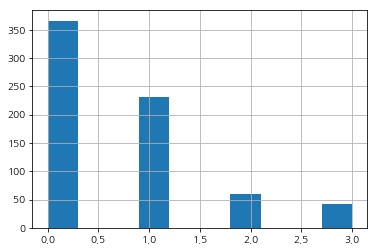

In [5]:
# F-rated 등급 별 영화 수, 비율(분석 전체 영화 대비) eg. 3등급은 n개고, 이건 n%. 2등급은 ….
df['F-rated'].hist()

In [6]:
data =df.groupby('F-rated')['영화코드'].size().reset_index()
F_rated_count = data.rename(columns={'영화코드': '영화 수'})
F_rated_count['전체 영화 중 비율(%)'] = round(F_rated_count['영화 수'] * 100/ sum(F_rated_count['영화 수']), 2)
F_rated_count

,F-rated,영화 수,전체 영화 중 비율(%)
0,0,366,52.36
1,1,231,33.05
2,2,60,8.58
3,3,42,6.01


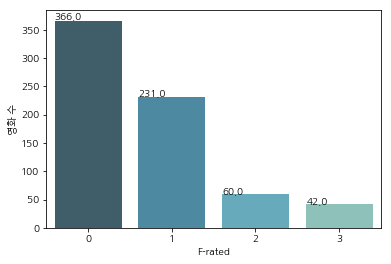

In [7]:
# F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

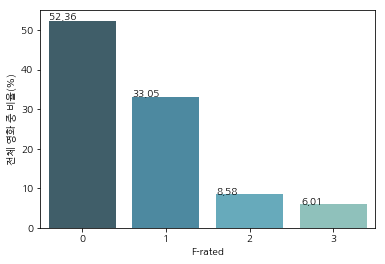

In [8]:
# F-rated 지수별 비율
ax = sns.barplot(x='F-rated', y='전체 영화 중 비율(%)', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

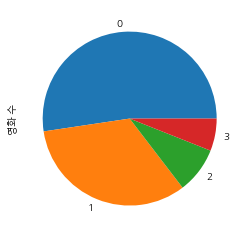

In [9]:
ax = F_rated_count['영화 수'].plot.pie()
# 컬러
# annotation

# 성비 - F-rated

### 대표감독 성별 - F-rated

In [10]:
# 대표감독 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['감독성별'] == '여자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '여자']['영화 수'])
data.loc[data['감독성별'] == '남자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '남자']['영화 수'])
data['감독성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['감독성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,감독성별,F-rated,영화 수,감독성별 전체 영화 수,감독성별에 따른 F-rated 지수 비율(%)
0,남자,0,364,602.0,60.47
1,남자,1,218,602.0,36.21
2,남자,2,20,602.0,3.32
3,여자,1,12,94.0,12.77
4,여자,2,40,94.0,42.55
5,여자,3,42,94.0,44.68


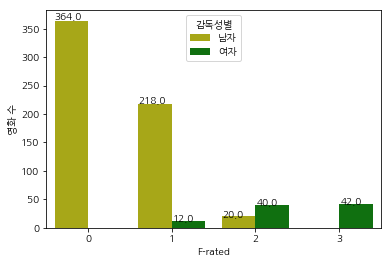

In [11]:
# 대표감독성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

남성 감독의 경우 F-rated 지수가 높아질수록 영화 수가 현저히 줄어드는데 반해, 

여성 감독의 경우 F-rated 지수가 높은 영화의 비중이 훨씬 높다

    → 여성 감독들이 남성 감독에 비해 여성 배우, 여성 작가와 협업하는 비율이 높다
    → 감독이 여성인 경우, 약 90% 가 주연배우나 작가 중 여성을 1 명 이상 기용한다

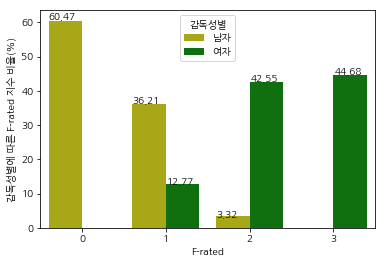

In [12]:
# 대표감독성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='감독성별에 따른 F-rated 지수 비율(%)',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

비율로 보면 감독성별에 따른 F-rated 차이가 훨씬 두드러진다

### 대표작가 성별 - F-rated

In [13]:
# 대표작가 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['작가성별'] == '여자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '여자']['영화 수'])
data.loc[data['작가성별'] == '남자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '남자']['영화 수'])
data['작가성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['작가성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,작가성별,F-rated,영화 수,작가성별 전체 영화 수,작가성별에 따른 F-rated 지수 비율(%)
0,남자,0,311,443.0,70.20
1,남자,1,131,443.0,29.57
2,남자,2,1,443.0,0.23
3,여자,1,55,149.0,36.91
4,여자,2,52,149.0,34.90
5,여자,3,42,149.0,28.19


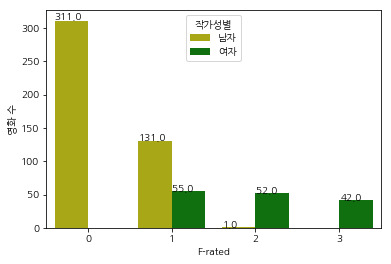

In [14]:
# 대표작가성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

대표 작가가 남성인 경우 F-rated 2등급이 거의 없다

    대표 작가가 남성인 경우, 대표 감독이 남성인 경우보다 F-rated 가 낮은 것을 알 수 있다

대표 작가가 여성인 경우, F-rated 등급은 고르게 퍼져있는 편

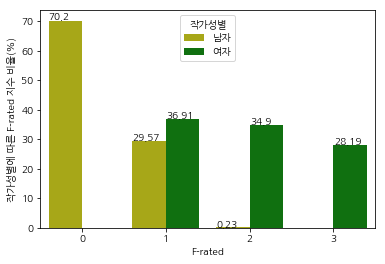

In [15]:
# 대표작가성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='작가성별에 따른 F-rated 지수 비율(%)',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

In [16]:
# 대표 감독이 곧 대표 작가인 경우
# print(df[df['감독코드'] == df['작가코드']].shape)
df[df['감독코드'] == df['작가코드']][['영화명', '대표감독']]
df[df['감독코드'] == df['작가코드']]['대표감독'].value_counts()

print('감독 == 작가: ')
print(df[df['감독코드'] == df['작가코드']]['감독성별'].value_counts())
print(' ')
print('감독 != 작가: ')
print(df[df['감독코드'] != df['작가코드']]['감독성별'].value_counts())
# df['감독성별'].value_counts()

감독 == 작가: 
남자    305
여자     58
Name: 감독성별, dtype: int64
 
감독 != 작가: 
남자    297
여자     36
Name: 감독성별, dtype: int64


대표감독이 곧 대표작가인 경우가 전체의 절반가량

감독성비 자체가 7:1로 기울어 있으므로 F-rated 가 쏠릴 수 밖에 없음

### 주연배우 성별 - F-rated

In [17]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%)
0,남자,0,352,448.0,78.57
1,남자,1,65,448.0,14.51
2,남자,2,31,448.0,6.92
3,여자,1,164,234.0,70.09
4,여자,2,28,234.0,11.97
5,여자,3,42,234.0,17.95


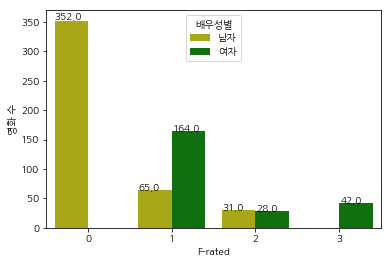

In [18]:
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

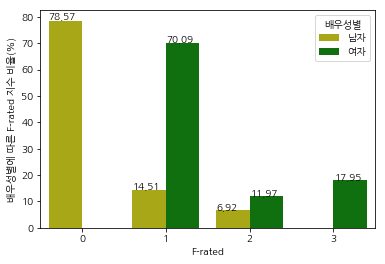

In [19]:
# 주연배우성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='배우성별에 따른 F-rated 지수 비율(%)',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

주연배우가 여성인 영화가 대표감독이나 대표작가가 여성인 영화에 비해 월등히 많다

    → 에로영화 때문인지 살펴보기

주연배우가 남성인 경우 대부분의 영화가 F-rated 지수 0 이다

    → 대표감독이나 대표작가가 남성인 영화에 비해 F-rated 지수 쏠림 현상이 더욱 심하다

### 여성주연이 많은 이유- 에로영화 때문인지 살펴보기

드라마, 다큐멘터리, 애니메이션이 전체의 50%
    
    에로영화는 대부분 [청소년관람불가-멜로/로맨스] 에 속하므로 에로영화 때문에 여성주연영화 중 F-rated 1 인 영화가 많았던 것은 아니다 

다큐멘터리, 애니메이션, 멜로/로맨스 에서 여성주연배우가 많음

In [31]:
df['대표장르'] = df['장르'].apply(lambda x: str(x).split(',')[0])
df[df['F-rated'] == 1]['대표장르'].value_counts()

# len(df[df['F-rated'] == 1]['대표장르'])

드라마       68
다큐멘터리     45
애니메이션     26
멜로/로맨스    19
코미디       14
미스터리      13
스릴러       12
사극         8
공포(호러)     8
범죄         8
액션         4
가족         3
판타지        2
공연         1
Name: 대표장르, dtype: int64

### 등급-장르 뜯어보기

#### 등급별
전체관람가는 [다큐멘터리], [애니메이션]이 대부분

청소년관람불가는 두 분류로 나눌 수 있을 것
- [멜로/로맨스] -> 대부분 에로영화
- [드라마], [범죄], [스릴러], [액션], [미스터리], [코미디]

### 여성주연비율과 등급-장르의 관계
#### 여성주연 비율 높은 등급-장르
- 전체관람가: 애니메이션, 드라마, 다큐멘터리
- 12세이상관람가: 멜로/로맨스
- 15세이상관람가: 멜로/로맨스, 미스터리
- 청소년관람불가: 스릴러

    → 청소년관람불가-멜로/로맨스에서 여성주연비율이 급격히 줄어든 것은 에로영화 때문

    → 미스터리, 스릴러의 경우 여성주연일 때 더 무서우니까 그런가?

#### 여성주연 비율이 특히 낮은 등급-장르
- 전체관람가: 
- 12세이상관람가: 사극, 전쟁
- 15세이상관람가: 액션, 범죄, 코미디
- 청소년관람불가: 범죄

    → 전쟁, 액션, 범죄, 사극은 남성의 전유물
    
    → 코미디는 15세이상관람가에서 가장 영화수가 많고, 가장 여성주연비율이 낮다
        임창정, 정상훈, 공형진, 유해진, 최성국 등 코미디물을 전문으로하는 남성주연배우는 꽤 있는데, 코미디 여성주연배우는 풀 자체가 없는 듯
        
#### 특이점
[전체관람가-다큐멘터리]에서는 여성주연비율이 50% 가까이 되는데, 12세이상관람가와 15세이상관람가로 등급이 높아질수록 여성주연비율이 20% 대까지 낮아진다


[전체관람가-애니메이션]에서는 여성주연비율이 50% 이상인데, 나머지 등급에서는 여성주연이 거의 없다


[사극]에서는 여성주연 영화를 거의 찾아보기 힘들다 


등급, 장르 모두 파이가 작은 곳에서만 여성주연비율이 높은 것을 알 수 있다. 
    - 등급: 전체관람가, 청소년관람불가
    - 장르: 다큐멘터리, 애니메이션 (심지어 다큐멘터리는 배우가 나오지도 않음)
    
    → 유일하게 파이가 큰 분야에서 여성주연비율이 높은 건 [12세이상관람가-멜로/로맨스], [15세이상관람가-멜로/로맨스]

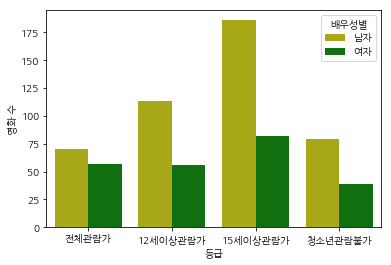

In [32]:
# 영화 등급별 주연배우 성비
data = df.groupby(['배우성별', '등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.barplot(y='영화 수', hue='배우성별', x='등급', data=data, order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), palette=['y', 'g'])

전체관람가에서 여성주연배우 비율이 높다

전체 영화수가 많은 등급일수록 (12세이상관람가, 15세이상관람가) 여성주연배우 비율이 낮다
    
    → 등급별로 장르를 구분해서 살펴보기

# F-rated 지수-장르

In [ ]:
# df[df['등급'] == '전체관람가'][['영화명', '대표장르', '배우성별']]
# df[df['등급'] == '전체관람가']['대표장르'].value_counts()
# data = df.groupby(['등급', '대표장르', '배우성별'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# data

# plt.figure(figsize=[20, 6])
# sns.barplot(x='대표장르', y='영화 수', hue='등급', hue_order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), data=data)

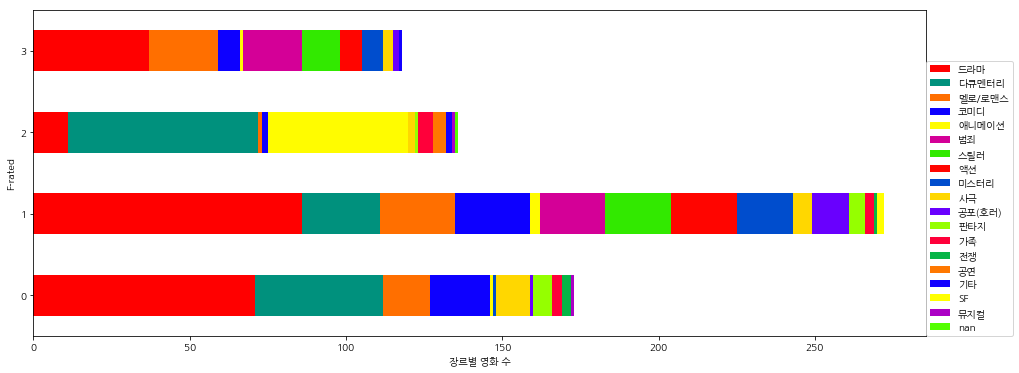

In [273]:
data = df.groupby(['등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})
grade_genre = df.groupby(['등급', '대표장르'])['영화코드'].size()

# 장르 순서 세팅
data_genre = df.groupby('대표장르')['영화코드'].size().reset_index()

# 등급-장르별 영화수 넣기
for genre in data_genre.sort_values('영화코드', ascending=False)['대표장르']:
    for grade in df['등급'].unique():
        if genre in list(grade_genre[grade].reset_index()['대표장르']):
            data.loc[data['등급'] == grade, f'{genre}'] = grade_genre[grade][genre]
        else: data.loc[data['등급'] == grade, f'{genre}'] = 0


# 등급-장르별 영화수 stack bar plot 그리기
ax = data.drop('영화 수', axis=1).plot(figsize=(16, 6), kind='barh', stacked=True, colormap='prism')

# # 영화수 표시
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
# #     if width > 10:
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
# #             f'{genre}',
#             '{:.0f}'.format(width), 
#             horizontalalignment='center', 
#             verticalalignment='center')
           
plt.xlabel('장르별 영화 수')
plt.ylabel('F-rated')
plt.legend(loc=[1, 0])

<Figure size 1152x432 with 0 Axes>

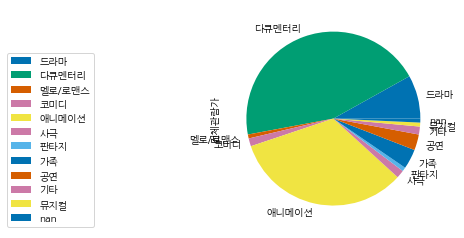

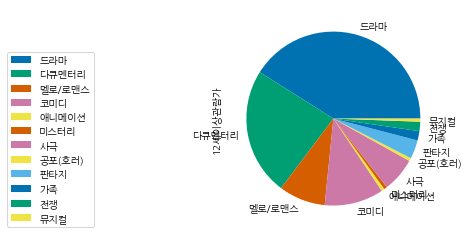

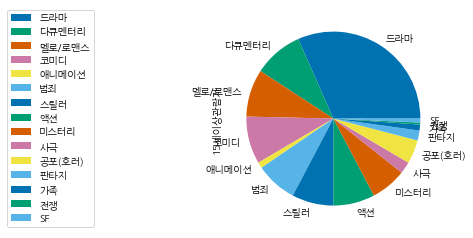

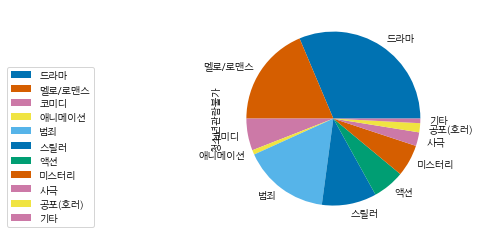

In [34]:
# 등급별 장르 파이차트

data = df[df['등급'] == '전체관람가'].groupby(['대표장르'])['영화코드'].size().reset_index().rename(columns={'영화코드': '영화 수'})
data = data.rename(columns={'영화 수':'전체관람가'})
data = data.merge(df[df['등급'] == '12세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'12세이상관람가'})
data = data.merge(df[df['등급'] == '15세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'15세이상관람가'})
data = data.merge(df[df['등급'] == '청소년관람불가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'청소년관람불가'})
data = data.merge(df.groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'전체등급'})
data

data_grade_genre = data.sort_values('전체등급', ascending=False).transpose().reset_index()
data_grade_genre.columns = data_grade_genre.iloc[0]
data_grade_genre = data_grade_genre.drop(data_grade_genre.index[0]).rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.fillna(0)
data_grade_genre = data_grade_genre.set_index('등급')

data_grade_genre
plt.figure(figsize=[16, 6])

# print(plt.style.available)
plt.style.use('seaborn-colorblind')
data_grade_genre.transpose().plot.pie(y='전체관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='12세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='15세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='청소년관람불가')
plt.legend(loc=[-1,0])

애니메이션은 대부분 전체관람가
다큐멘터리는 절반 정도 전체관람가, 나머지 절반은 12세이상관람가와 15세이상관람가

전체관람가를 제외한 모든 등급에서 드라마가 1순위

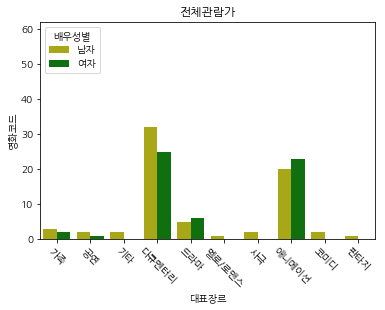

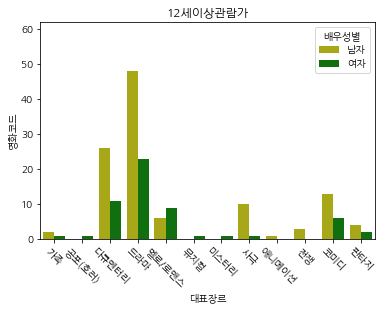

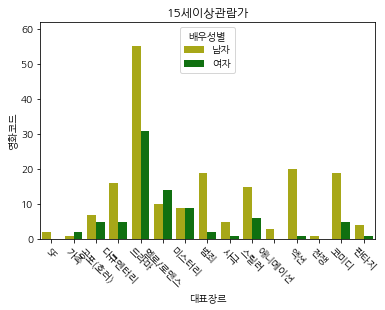

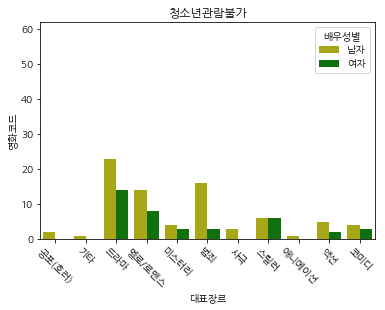

In [35]:
data = df.groupby(['대표장르', '등급', '배우성별'])['영화코드'].size().reset_index()

sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '전체관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('전체관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '12세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('12세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '15세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('15세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '청소년관람불가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('청소년관람불가')
plt.xticks(rotation=-45)
plt.show()

In [36]:
df[df['대표장르'] == '미스터리'][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '코미디')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '멜로/로맨스')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '드라마')][['상영횟수', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '코미디')]['영화명']
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '멜로/로맨스')]['영화명']

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]


,영화명,감독,주연배우,배우코드,배우필모
13,망원동 인공위성,김형주,송호준,20220936,망원동 인공위성
41,명량: 회오리 바다를 향하여,"정세교,김한민",김한민,10006204,봉오동 전투|사냥|명량: 회오리 바다를 향하여|명량|최종병기 활 감독확장판|최종병기...
50,마이 페어 웨딩,장희선,김조광수,10005655,출장수사|악질경찰|조선명탐정: 흡혈괴마의 비밀|흔들리는 물결|마이 페어 웨딩|경성학...
97,춘희막이,박혁지,김춘희,20190130,춘희막이
112,울보 권투부,이일하,도꾜 조선 중고급학교 권투부,0,NaN
130,나쁜 나라,"김진열,이수정,정일건",최경덕,20228869,소공녀|나쁜 나라
166,독도의 영웅들,권순도,김승헌,20267635,NaN
192,업사이드 다운,김동빈,박영우,20248319,NaN
223,빅뱅 메이드,변진호,권지용,10069845,빅뱅 메이드|원 오브 어 카인드 3D ; G-DRAGON 2013 1ST WORLD...
224,경계,"문정현,블라디미르 토도로비치,다니엘 루디 하리얀토",문정현,10026800,NaN


In [37]:
# data = df[df['등급'] == '청소년관람불가'].groupby(['배우성별', '대표장르', 'F-rated'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# sns.barplot(x='F-rated', y='영화 수', hue='배우성별', data=data[data['대표장르'] == '멜로/로맨스'])

# 연도별 - F-rated

In [38]:
df['datetime'] = pd.to_datetime(df['개봉일'])
df['year'] = pd.to_datetime(df['개봉일']).dt.year
df['month'] = pd.to_datetime(df['개봉일']).dt.month
df['day'] = pd.to_datetime(df['개봉일']).dt.day
df['weekday'] = pd.to_datetime(df['개봉일']).dt.dayofweek
df['weekday_name'] = pd.to_datetime(df['개봉일']).dt.weekday_name

# df = df.drop('dayofweek', axis=1)
# df = df.rename(columns={'weekday':'weekday_name'})
print(df.shape)
df.sample()

(699, 45)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,datetime,year,month,day,weekday,weekday_name,대표장르
361,파란나비효과,20174281,2017-06-22,한국,한국,다큐멘터리,12세이상관람가,장편,독립/예술영화,헤이앤컴퍼니,(주)인디플러그,475.0,41.0,34617100.0,4980.0,18860500.0,2508.0,0,박문칠,박문칠,10028610.0,남자,감독,파란나비효과|위켄즈|마이 플레이스|불청객|나는 곤경에 처했다!|너와 나의 21세기|...,박문칠,박문칠,박문칠,10028610.0,남자,감독,파란나비효과|위켄즈|마이 플레이스|불청객|나는 곤경에 처했다!|너와 나의 21세기|...,"배미영, 이수미, 김정숙, 이희동, 배정하, 이국민, 배은하",배미영,하담,0,NaN,배우,NaN,2017-06-22,2017,6,22,3,Thursday,다큐멘터리


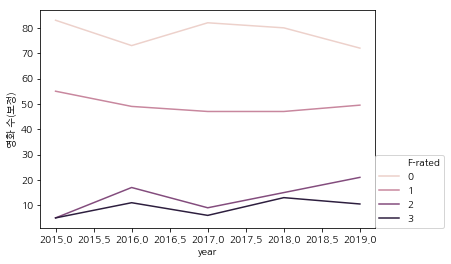

In [164]:
# 연도별 F-rated 등급 비율의 변화
data = df.groupby(['year', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

sns.lineplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)
plt.legend(loc=[1,0])

# sns.barplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)

(2019년 데이터는 8월까지 데이터를 이용해 보정값으로 계산)

F-rated 0, F-rated 1 등급은 줄어드는 중

F-rated 지수 2, 3 등급은 미미하지만 늘어나는 중

    → 전체적으로 서서히 F-rated 등급이 높아지고 있다고 볼 수 있음

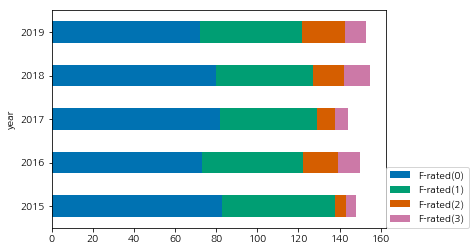

In [184]:
data = df.groupby(['year'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

year_f_rated = df.groupby(['year', 'F-rated'])['영화코드'].size()
for year in df['year'].unique():
    for i in range(4):
        data.loc[data['year'] == year, f'F-rated({i})'] = year_f_rated[year][i]

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
for column in list(data.columns)[2:]:
    data.loc[data['year'] == 2019, column] = data[column] * 3/2

# stack bar plot
data.set_index('year').drop('영화 수', axis=1).plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

## 연도별 F-rated 비율

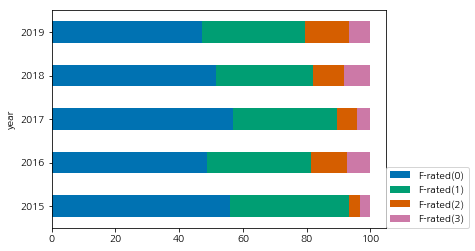

In [186]:
data = df.groupby(['year'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

year_f_rated = df.groupby(['year', 'F-rated'])['영화코드'].size()
for year in df['year'].unique():
    for i in range(4):
        data.loc[data['year'] == year, f'F-rated({i})'] = year_f_rated[year][i] * 100 / data[data['year'] == year]['영화 수']

# stack bar plot
data.set_index('year').drop('영화 수', axis=1).plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

비율로 보면 

F-rated 0 인 영화 수 줄고 있다

F-rated 1 인 영화 수 큰 차이 없지만 줄고 있다

F-rated 2 인 영화 수 늘고 있다

F-rated 3 인 영화 수 늘고 있다

→ 전체적으로 2016년에 수치가 급격히 변화했다가 다시 돌아간 후 천천히 변화중

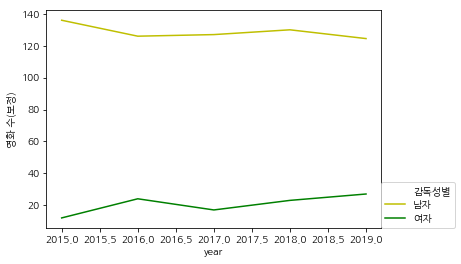

In [40]:
### 연도별 대표감독 성비 변화 추이
data = df.groupby(['year', '감독성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='감독성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])

대표감독, 대표작가, 주연배우 중 성비가 가장 크게 차이나는 것은 대표감독 

    여성 1: 남성 7
    
여성 대표감독 수는 느리지만 꾸준히 늘고있는 것으로 보인다

    2016년에 2배가량 증가 이후 2017년 감소

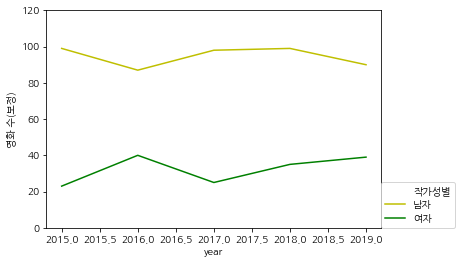

In [41]:
### 연도별 대표작가 성비 변화 추이
data = df.groupby(['year', '작가성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='작가성별', data=data, palette=['y', 'g'])
plt.ylim([0, 120])
plt.legend(loc=[1,0])

2016년에 F-rated 변동이 컸던 것은 대표작가 때문인 것으로 확인

    → 여성 대표작가 수가 2016년에 가장 늘어남 2배 가량

이후 2017년 다시 2015년 수준으로 감소했지만 다시 늘고 있음

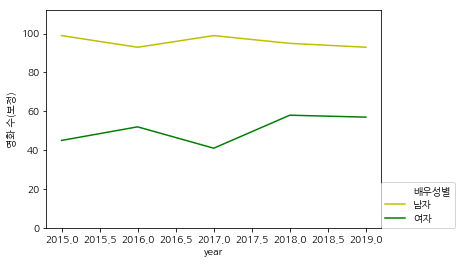

In [42]:
### 연도별 주연배우 성비 변화 추이
data = df.groupby(['year', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='배우성별', data=data, palette=['y', 'g'])
plt.ylim([0, 112])
plt.legend(loc=[1,0])

대표감독, 대표작가, 주연배우 중에서 주연배우가 여성 비율이 가장 큼
    
    여성 1: 남성2
    
2016년에 여성주연 늘어났다가 2017년에 줄어듬

    2018년에 다시 2016년 수준으로 늘어남

남성주연 수에 큰 변화 없음
    
    아주 미미하게 줄어드는 것으로 보임

# 상영횟수등급 - F-rated

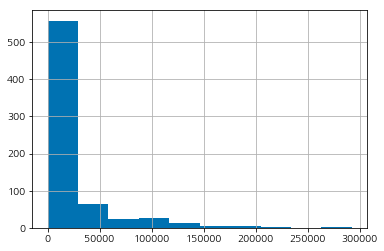

In [44]:
# 상영횟수등급(가칭)에 따른 F-rated 등급 비율의 변화
df['상영횟수'].hist()

In [45]:
df['상영횟수'].describe()

count       699.000000
mean      19700.154506
std       37282.422539
min          40.000000
25%         413.500000
50%        2160.000000
75%       19938.500000
max      292578.000000
Name: 상영횟수, dtype: float64

## 상영횟수 등급 4개로 나누기

등급 | 범위
-|-
4 | 40 <= x < 413.5
3 | 413.5 <= x < 2_160
2 | 2_160 <= x < 19_938
1 | 19_938 <= x

In [116]:
df['상영횟수등급'] = 4
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 413.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
683,10199.0,3


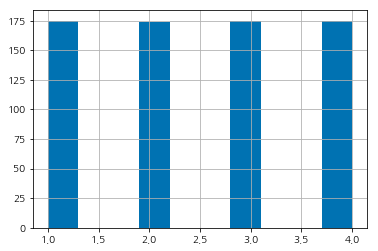

In [117]:
df['상영횟수등급'].hist()

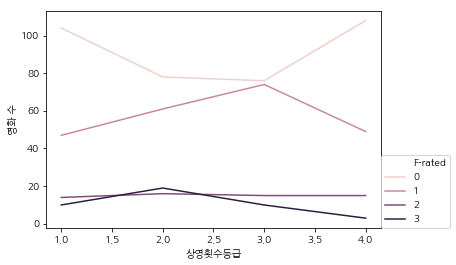

In [118]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

F-rated 0 은 상영횟수 중간등급에서 줄어든다

F-rated 1 은 F-rated 0 과 반대로 움직인다

F-rated 2 는 전 상영횟수등급에 고르게 분포해있다

F-rated 3 상영횟수등급 2에서 가장 많고 상영횟수가 많아질수록 적어진다

    → 상영횟수등급이 올라갈수록 여성영화가 늘다가 최고등급에서 꺾인다

# 상영횟수등급을 좀 더 촘촘하게 나눠보자


등급 | 범위
-|-
16 | x < 119.5
15 | 119.5 <= x < 203
14 | 203 <= x < 310
13 | 310 <= x <415
12 | 415 <= x < 563
11 | 563 <= x < 768.5
10 | 768.5 <= x < 1_257.5
9 | 1_257.5 <= x < 2_160
8 | 2_160 <= x < 4_077
7 | 4_077 <= x < 6_298
6 | 6_298 <= x < 11_339
5 | 11_339 <= x < 19_938
4 | 19_938 <= x < 36_117
3 | 36_117 <= x < 53_005
2 | 53_005 <= x < 94_249
1 | 94_249 <= x

In [133]:
# print(df[df['상영횟수등급'] == 1]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 2]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 3]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 4]['상영횟수'].describe())
df['상영횟수등급'] = 16
df.loc[df['상영횟수'] < 94_249, '상영횟수등급'] = 15
df.loc[df['상영횟수'] < 53_005, '상영횟수등급'] = 14
df.loc[df['상영횟수'] < 36_117, '상영횟수등급'] = 13
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 12
df.loc[df['상영횟수'] < 11_339, '상영횟수등급'] = 11
df.loc[df['상영횟수'] < 6_298, '상영횟수등급'] = 10
df.loc[df['상영횟수'] < 4_077, '상영횟수등급'] = 9
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 8
df.loc[df['상영횟수'] < 1_257.5, '상영횟수등급'] = 7
df.loc[df['상영횟수'] < 768.5, '상영횟수등급'] = 6
df.loc[df['상영횟수'] < 563, '상영횟수등급'] = 5
df.loc[df['상영횟수'] < 415, '상영횟수등급'] = 4
df.loc[df['상영횟수'] < 310, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 203, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 119.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
223,1799.0,8


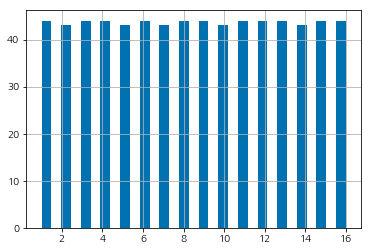

In [120]:
df['상영횟수등급'].hist(bins=31)

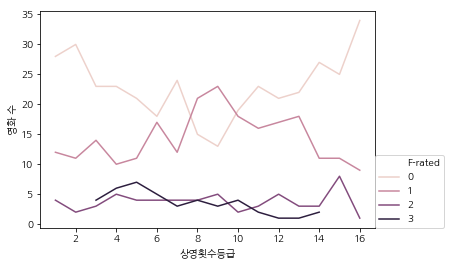

In [121]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

F-rated 0 인 영화는 상영횟수등급 8 에서 가장 적고, 상영횟수가 많을수록, 적을수록 양쪽 모두 증가한다
    
    흥행에 성공하는 영화일수록 
    흥행이 안되는 영화일수록
    → 유리천장, 유리바닥
    → 유리천장이 좀 더 공고하다
    
F-rated 1 인 영화는 F-rated 0 을 뒤집어 놓은 그래프 모양

F-rated 2 인 영화는 상영횟수등급 전체에 골고루 분포해있다 
    
    상영횟수등급 15 에서 갑자기 많음 - 뭘까? 대중에게 일정 이상 노출되는 여성영화는 흥행하는 건가

F-rated 3 인 영화는 상영횟수등급이 높을수록 증가한다
    
    상영횟수등급 15~16 최고흥행, 1~2 최저흥행 영화 중에는 없다
    → F-rated 0 과 마찬가지로 유리천장, 유리바닥이 생각나는 대목

In [78]:
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 16)][['영화명', '감독', '배우', '장르']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 15)][['영화명', '감독', '배우', '장르']]

,영화명,감독,배우,장르
80,뷰티 인사이드,백,"한효주,김대명,도지한,배성우,박신혜,이범수,박서준,김상호,천우희,우에노 주리,이재준...","판타지,멜로/로맨스"
222,굿바이 싱글,김태곤,"김혜수,마동석,김현수,김용건,서현진,곽시양,전석호,이미도,이성민,황미영,이형미,박지...","코미디,드라마"
394,아이 캔 스피크,김현석,"나문희,이제훈,박철민,염혜란,성유빈,김소진,이상희,정연주,이지훈,손숙,박준서,이승민...",코미디
415,부라더,장유정,"마동석,이동휘,이하늬,류정수,배준수,석정호,신은영,안백승,안승주,채지혜,이성은,이수...",코미디
466,리틀 포레스트,임순례,"김태리,류준열,문소리,진기주,홍성덕,이광용,이상준,김재훈,이유진,김정은,김주은,이태...",드라마
598,말모이,엄유나,"유해진,윤계상,김홍파,우현,김태훈,김선영,민진웅,이성욱,조현철,오희준,정기섭,허성태...",드라마
632,생일,이종언,"설경구,전도연,김보민,윤찬영,박종환,성유빈,탕준상,신문성,이봉련,김수진,안다정",드라마
696,유열의 음악앨범,정지우,"김고은,정해인,박해준,김국희,정유진,최준영,심달기,나철,권은수","멜로/로맨스,드라마"


# 상영횟수등급-연도별

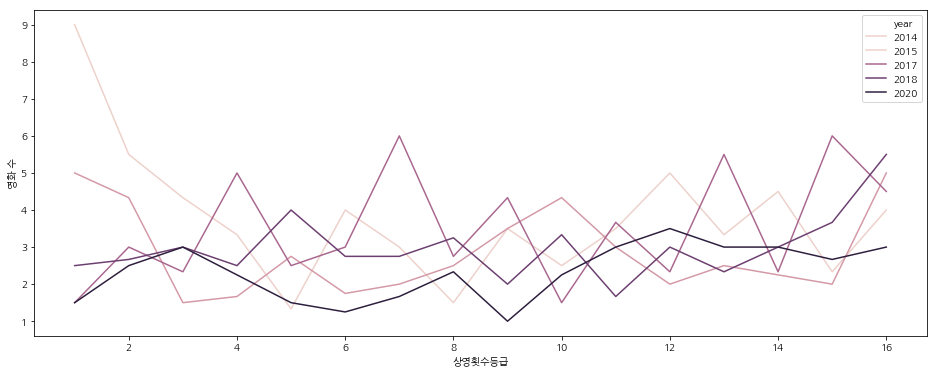

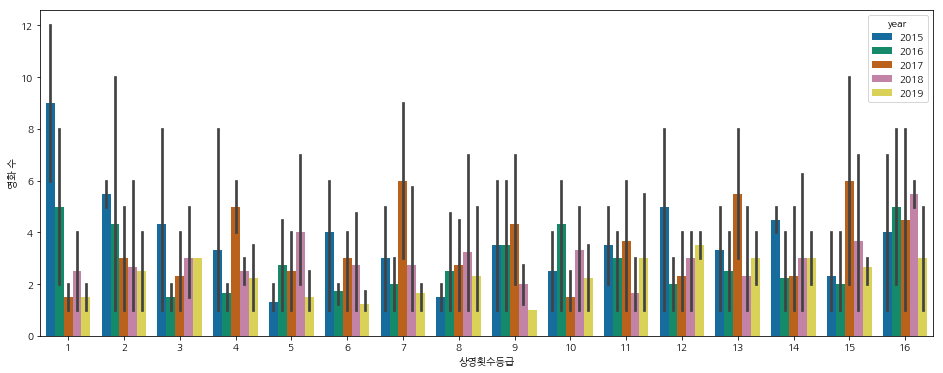

In [149]:
data = df.groupby(['year', '상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

plt.figure(figsize=[16, 6])
# sns.catplot(x='상영횟수등급', y='영화 수', hue='F-rated', kind='box', data=data)
sns.lineplot(x='상영횟수등급', y='영화 수', hue='year', data=data, ci=None)
plt.show()

plt.figure(figsize=[16, 6])
sns.barplot(x='상영횟수등급', y='영화 수', hue='year', data=data)
plt.show()
# data.T.plot(kind='bar', stacked=True)

# data

# 상영횟수등급 한번 더 쪼개본다

In [108]:
df[df['상영횟수등급'] == 1]['상영횟수'].describe()
df[df['상영횟수등급'] == 2]['상영횟수'].describe()
df[df['상영횟수등급'] == 3]['상영횟수'].describe()
df[df['상영횟수등급'] == 4]['상영횟수'].describe()
df[df['상영횟수등급'] == 5]['상영횟수'].describe()
df[df['상영횟수등급'] == 6]['상영횟수'].describe()
df[df['상영횟수등급'] == 7]['상영횟수'].describe()
df[df['상영횟수등급'] == 8]['상영횟수'].describe()
df[df['상영횟수등급'] == 9]['상영횟수'].describe()
df[df['상영횟수등급'] == 10]['상영횟수'].describe()
df[df['상영횟수등급'] == 11]['상영횟수'].describe()
df[df['상영횟수등급'] == 12]['상영횟수'].describe()
df[df['상영횟수등급'] == 13]['상영횟수'].describe()
df[df['상영횟수등급'] == 14]['상영횟수'].describe()
# df[df['상영횟수등급'] == 15]['상영횟수'].describe()
# df[df['상영횟수등급'] == 16]['상영횟수'].describe()

count     44.000000
mean     248.000000
std       29.045273
min      203.000000
25%      223.000000
50%      243.500000
75%      270.250000
max      309.000000
Name: 상영횟수, dtype: float64

In [122]:
df['상영횟수등급'] = 32
df.loc[df['상영횟수'] < 126_527.5, '상영횟수등급'] = 31
df.loc[df['상영횟수'] < 94_249, '상영횟수등급'] = 30
df.loc[df['상영횟수'] < 65_281, '상영횟수등급'] = 29
df.loc[df['상영횟수'] < 53_005, '상영횟수등급'] = 28
df.loc[df['상영횟수'] < 45_453, '상영횟수등급'] = 27
df.loc[df['상영횟수'] < 36_117, '상영횟수등급'] = 26
df.loc[df['상영횟수'] < 25_465, '상영횟수등급'] = 25
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 24
df.loc[df['상영횟수'] < 16_176.5, '상영횟수등급'] = 23
df.loc[df['상영횟수'] < 11_339, '상영횟수등급'] = 22
df.loc[df['상영횟수'] < 8_299, '상영횟수등급'] = 21
df.loc[df['상영횟수'] < 6_298, '상영횟수등급'] = 20
df.loc[df['상영횟수'] < 5_178, '상영횟수등급'] = 19
df.loc[df['상영횟수'] < 4_077, '상영횟수등급'] = 18
df.loc[df['상영횟수'] < 2_764, '상영횟수등급'] = 17
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 16
df.loc[df['상영횟수'] < 1_554, '상영횟수등급'] = 15
df.loc[df['상영횟수'] < 1_257.5, '상영횟수등급'] = 14
df.loc[df['상영횟수'] < 1_048, '상영횟수등급'] = 13
df.loc[df['상영횟수'] < 768.5, '상영횟수등급'] = 12
df.loc[df['상영횟수'] < 635.5, '상영횟수등급'] = 11
df.loc[df['상영횟수'] < 563, '상영횟수등급'] = 10
df.loc[df['상영횟수'] < 462, '상영횟수등급'] = 9
df.loc[df['상영횟수'] < 415, '상영횟수등급'] = 8
df.loc[df['상영횟수'] < 364, '상영횟수등급'] = 7
df.loc[df['상영횟수'] < 310, '상영횟수등급'] = 6
df.loc[df['상영횟수'] < 243.5, '상영횟수등급'] = 5
df.loc[df['상영횟수'] < 203, '상영횟수등급'] = 4
df.loc[df['상영횟수'] < 153, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 119.5, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 65.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
598,87841.0,30


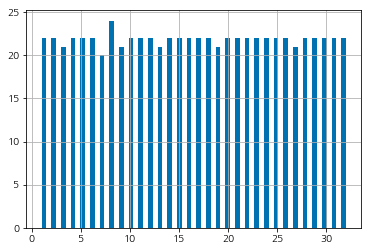

In [123]:
df['상영횟수등급'].hist(bins=63)

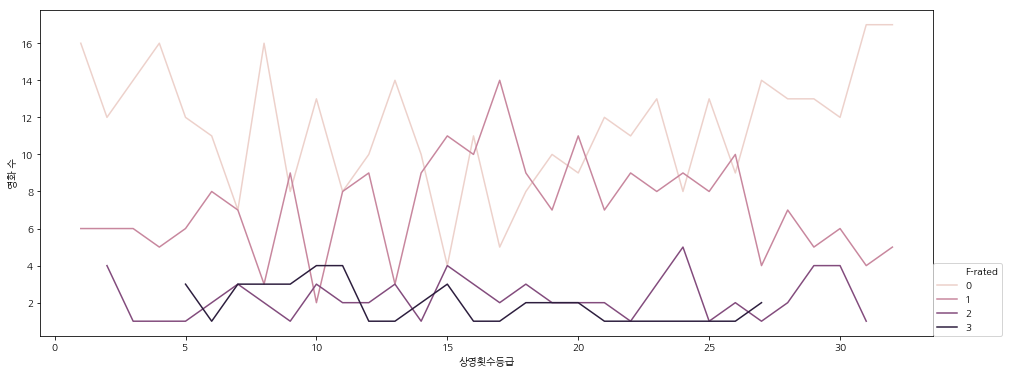

In [125]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

plt.figure(figsize=[16, 6])
sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

16 등급이 적절한듯

In [128]:
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 24)][['영화명', '장르', '감독', '배우']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 29)][['영화명', '장르', '감독', '배우']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 30)][['영화명', '장르', '감독', '배우']]

,영화명,장르,감독,배우
394,아이 캔 스피크,코미디,김현석,"나문희,이제훈,박철민,염혜란,성유빈,김소진,이상희,정연주,이지훈,손숙,박준서,이승민..."
466,리틀 포레스트,드라마,임순례,"김태리,류준열,문소리,진기주,홍성덕,이광용,이상준,김재훈,이유진,김정은,김주은,이태..."
598,말모이,드라마,엄유나,"유해진,윤계상,김홍파,우현,김태훈,김선영,민진웅,이성욱,조현철,오희준,정기섭,허성태..."
632,생일,드라마,이종언,"설경구,전도연,김보민,윤찬영,박종환,성유빈,탕준상,신문성,이봉련,김수진,안다정"


In [57]:
# 전국매출액/상영횟수 - 재민님

Index(['영화명', '영화코드', '개봉일', '대표국적', '국적', '장르', '등급', '영화형태', '영화구분', '제작사',
       '배급사', '상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', 'F-rated',
       '감독', '대표감독', '감독코드', '감독성별', '감독_대표역할', '감독필모', '작가', '대표작가',
       '대표작가(필명)', '작가코드', '작가성별', '작가_대표역할', '작가필모', '배우', '주연배우', '배역명',
       '배우코드', '배우성별', '배우_대표역할', '배우필모', 'datetime', 'year', 'month', 'day',
       'weekday', 'weekday_name', '대표장르', '상영횟수등급'],
      dtype='object')

In [ ]:
# 전국관객수/상영횟수 - 재민님

In [ ]:
# 상영횟수등급 중위값에서 F-rated 등급이 높다 (상영횟수등급 낮을수록 에로영화 많고, 고예산 영화는 알탕)

# 추가하고 싶은 컬럼
- 감독 필모 갯수
- 작가 필모 갯수
- 배우 필모 갯수


- 감독 여러명인 경우 성비
- 작가 여러명인 경우 성비